# MCMC from scratch

A simple example of Markov Chain Monte Carlo (MCMC) for sampling from the posterior distribution - 

adapted from: https://towardsdatascience.com/introduction-to-mcmc-1c8e3ea88cc9

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### Define Metropolis sampling procedure

In [100]:
def metropolis(pi, dims, n_samples, burn_in=0.1, var=1):
    # start with random initial position
    theta_ = np.random.randn(dims)*var
    samples = np.empty((n_samples, dims))
    # sampling loop
    for i in range(n_samples):
    # while len(samples) < n_samples:
        # proposal step
        theta = theta_ + np.random.randn(dims)*var
        
        # ratio of probabilities between proposed and current step
        ratio = pi(theta)/pi(theta_)

        # check acceptance - note: if ratio > 1, by def. larger than rv and accepted:
        if np.random.rand(1) < ratio:
            sample = theta
            theta_ = theta
            samples[i,:] = sample
            # samples.append(sample)

        # reject: remain at original state and add to trace:
        else:
            sample = theta_
            samples[i,:] = sample

    # remove burn-in phase (to do)
    return samples[int(n_samples*burn_in):,:]

### Example: multimodal Gaussian model

In [101]:
from scipy.stats import multivariate_normal
def make_pdf(mean1, mean2, cov1, cov2):
    pdf1 = multivariate_normal(mean1, cov1)
    pdf2 = multivariate_normal(mean2, cov2)
    def pdf(x):
        return pdf1.pdf(x) + pdf2.pdf(x)
    return pdf


In [102]:
mean1 = [3, 3]
mean2 = [-1, -1]
cov1 = np.array([[1,0.5],[0.5,1]], dtype=float)
cov2 = np.array([[1,-0.3],[-0.3,1]], dtype=float)
pdf1 = multivariate_normal(mean1, cov1)
pdf2 = multivariate_normal(mean2, cov2)

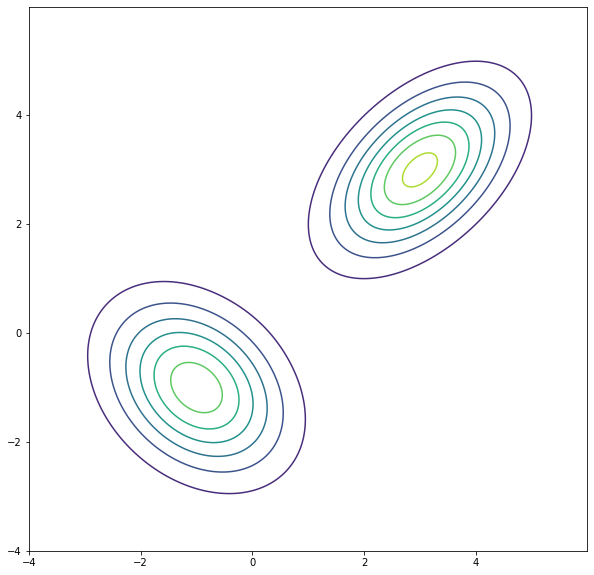

In [103]:
plt.figure(figsize=(10,10))
x, y = np.mgrid[-4:6:.01, -4:6:.01]
pos = np.dstack((x, y))
plt.contour(x, y, pdf1.pdf(pos) + pdf2.pdf(pos))
plt.savefig("multigauss.png")

In [104]:
pdf = make_pdf(mean1, mean2, cov1, cov2)

### Perform sampling

In [105]:
# %%timeit
samples = metropolis(pdf, 2, 10_000, 0., 1)

In [106]:
def plot_samples(s_plot=1000):
    plt.figure(figsize=(10,10))
    plt.contourf(x, y, pdf1.pdf(pos) + pdf2.pdf(pos), 10, cmap='gray_r', alpha=0.4) #, linewidth=0)
    plt.scatter(samples[:s_plot,0], samples[:s_plot,1], s=1.5, c='k')
    plt.plot(samples[:s_plot,0], samples[:s_plot,1], lw=1, alpha=0.5)
    plt.xlim([-4,6])
    plt.ylim([-4,6])
    # plt.savefig("multigauss_sampling.png")

In [107]:
s_plot = 1000 # number of samples to plot from beginning of trace 

# plot_samples(s_plot)

What happens, if we increase the proposal step size?

In [108]:

interact(plot_samples, s_plot=widgets.IntSlider(min=0, max=5000, step=100, value=0));

interactive(children=(IntSlider(value=0, description='s_plot', max=5000, step=100), Output()), _dom_classes=('…

### Investigate traces to gain insight

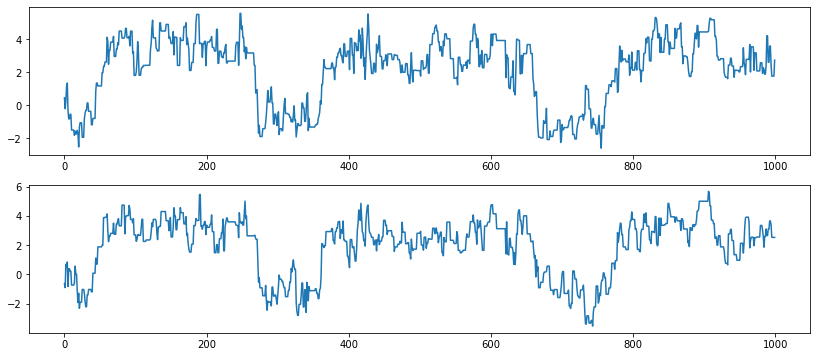

In [62]:
s_plot_max = 1000
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(samples[:s_plot_max,0])
ax2.plot(samples[:s_plot_max,1])

### Estimate probability density from samples

In [63]:
from scipy.stats import gaussian_kde

In [33]:
X, Y = np.mgrid[-4:6:.1, -4:6:.1]
positions = np.vstack([X.ravel(), Y.ravel()])

In [34]:
kernel = gaussian_kde(samples[:2000,:].T)

In [35]:
Z = np.reshape(kernel(positions).T, X.shape)

In [36]:
def plot_samples_and_density(s_plot=1000):
    plt.figure(figsize=(10,10))
    kernel = gaussian_kde(samples[:s_plot,:].T)
    Z = np.reshape(kernel(positions).T, X.shape)
    plt.contourf(x, y, pdf1.pdf(pos) + pdf2.pdf(pos), 10, cmap='gray_r', alpha=0.4) #, linewidth=0)
    plt.contour(X, Y, Z, 20, cmap='viridis_r', alpha=0.6)
    plt.scatter(samples[:s_plot,0], samples[:s_plot,1], s=1.5, c='k')
    plt.plot(samples[:s_plot,0], samples[:s_plot,1], lw=1, alpha=0.5)
    plt.xlim([-4,6])
    plt.ylim([-4,6])
    # plt.savefig("multigauss_sampling.png")

# plt.figure(figsize=(12,6))
# plt.contourf(x, y, pdf1.pdf(pos) + pdf2.pdf(pos), 10, cmap='gray_r', alpha=0.4, linewidth=0)

# plt.scatter(samples[:2000,0], samples[:2000,1], s=10.5)

In [37]:
interact(plot_samples_and_density, s_plot=widgets.IntSlider(min=10, max=5000, step=100, value=0));

interactive(children=(IntSlider(value=10, description='s_plot', max=5000, min=10, step=100), Output()), _dom_c…

### Simple 1-D example

In [38]:
from scipy.stats import norm

In [124]:
pdf_1D = norm(2, 2)

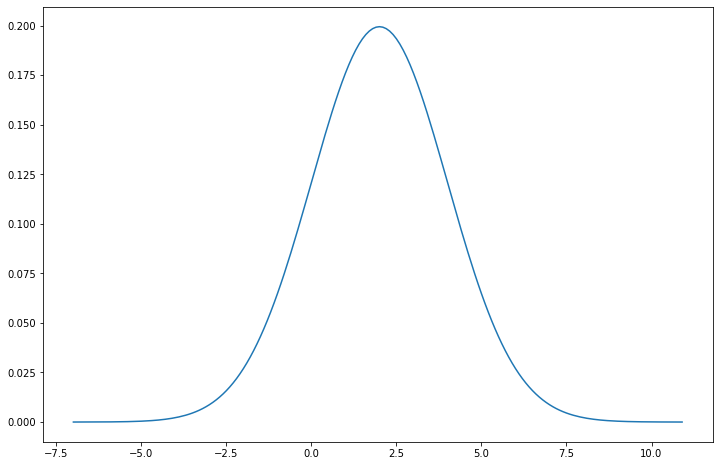

In [140]:
plt.figure(figsize=(12,8))
theta = np.arange(-7,11,0.1)
plt.plot(theta, pdf_1D.pdf(theta))

In [117]:
samples = metropolis(pdf_1D.pdf, 1, 10_000, 0., 1)

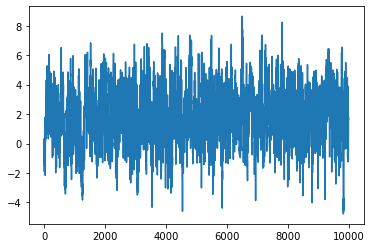

In [118]:
plt.plot(samples)

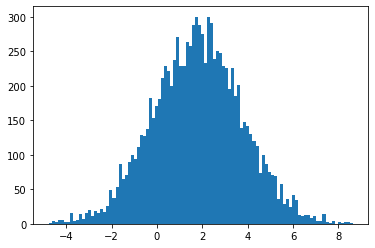

In [120]:
plt.hist(samples, 100);

In [143]:
def plot_1D_with_samples(n_plot_samples):
    plt.figure(figsize=(12,8))
    theta = np.arange(-7,11,0.1)
    plt.plot(theta, pdf_1D.pdf(theta))
    plt.vlines(samples[:n_plot_samples],0,0.02,'r', alpha=0.2)

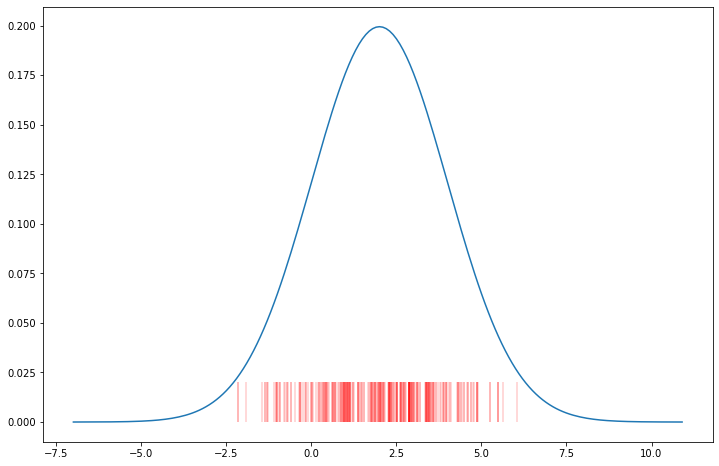

In [144]:
plot_1D_with_samples(299)

In [146]:
interact(plot_1D_with_samples, n_plot_samples=widgets.IntSlider(min=10, max=1000, step=10, value=0));

interactive(children=(IntSlider(value=10, description='n_plot_samples', max=1000, min=10, step=10), Output()),…

### Stepwise sampling vis

In [182]:
# Metropolis sampling with stored proposal step

def metropolis_with_proposals(pi, dims, n_samples, burn_in=0.1, var=1):
    # start with random initial position
    theta_ = np.random.randn(dims)*var
    samples = np.empty((n_samples, dims))
    proposals = np.empty((n_samples, dims))
    accepted = np.empty(n_samples)
    # sampling loop
    for i in range(n_samples):
    # while len(samples) < n_samples:
        # proposal step
        proposal = np.random.randn(dims)*var
        theta = theta_ + proposal

        # store proposals for later vis
        proposals[i,:] = proposal
        
        # ratio of probabilities between proposed and current step
        ratio = pi(theta)/pi(theta_)

        # check acceptance - note: if ratio > 1, by def. larger than rv and accepted:
        if np.random.rand(1) < ratio:
            sample = theta
            theta_ = theta
            samples[i,:] = sample
            accepted[i] = True
            # samples.append(sample)

        # reject: remain at original state and add to trace:
        else:
            sample = theta_
            samples[i,:] = sample
            accepted[i] = False

    # remove burn-in phase (to do)
    return samples[int(n_samples*burn_in):,:], proposals, accepted

In [183]:
samples, proposals, accepted = metropolis_with_proposals(pdf_1D.pdf, 1, 10_000, 0., 1)

In [199]:
def plot_1D_with_samples_and_proposal(n_plot_samples):
    # create plot with sampled locations and proposal step for current iteration
    plt.figure(figsize=(12,8))
    theta = np.arange(-7,11,0.1)
    plt.plot(theta, pdf_1D.pdf(theta))
    plt.vlines(samples[:n_plot_samples],0,0.02,'r', alpha=0.2)
    # proposal pdf
    proposal_pdf = norm(samples[n_plot_samples], var)
    plt.plot(theta, 0.3*proposal_pdf.pdf(theta))
    prop_pos = samples[n_plot_samples] + proposals[n_plot_samples]

    plt.plot(samples[n_plot_samples], pdf_1D.pdf(samples[n_plot_samples]), 'ko')
    plt.vlines(samples[n_plot_samples], 0, pdf_1D.pdf(samples[n_plot_samples]), 'k')
    
    if accepted[n_plot_samples]:
        plt.plot(prop_pos, pdf_1D.pdf(prop_pos), 'go')
        plt.vlines(prop_pos, 0, pdf_1D.pdf(prop_pos), 'g')
    else:
        plt.plot(prop_pos, pdf_1D.pdf(prop_pos), 'ro')
        plt.vlines(prop_pos, 0, pdf_1D.pdf(prop_pos), 'r')
        # plt.plot(prop_pos, 0.3*proposal_pdf.pdf(prop_pos), 'ro')
        # plt.vlines(prop_pos, 0, 0.3*proposal_pdf.pdf(prop_pos), 'r')


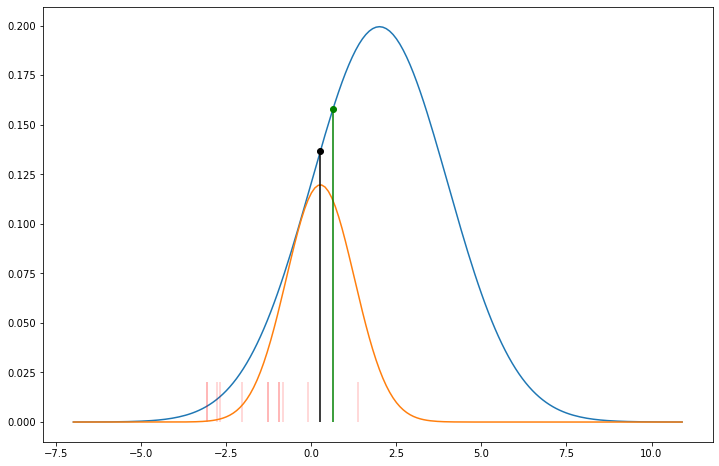

In [200]:
var = 1.
plot_1D_with_samples_and_proposal(12)

In [204]:
interact(plot_1D_with_samples_and_proposal, n_plot_samples=widgets.IntSlider(min=1, max=100, step=1, value=1));

interactive(children=(IntSlider(value=1, description='n_plot_samples', min=1), Output()), _dom_classes=('widge…

In [203]:
print(sum(accepted)/ 10000)

0.847
